### Import libraries

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


### Load data

notebooks\data_extraction.ipynb
datasets\Credit-Card-Fraud-Detection.csv

In [3]:
df=pd.read_csv(r'..\datasets\Credit-Card-Fraud-Detection.csv')
df

,age,income,loan_amount,credit_score,employment_status,default(y),loan_term,interest_rate,debt_to_income_ratio,num_of_dependents,education_level,home_ownership,marital_status,credit_history_length,num_credit_lines,late_payments,bankruptcies,annual_savings,retirement_savings,monthly_expenses
0,38,71440,27069,689,self-employed,1,36,9.937874,31.046101,0,high_school,rent,married,7,6,1,1,25259,195208,6037
1,36,90200,14895,578,employed,0,48,13.624882,21.845252,0,high_school,own,married,11,16,8,0,40761,152999,4064
2,47,85896,2613,352,employed,1,12,6.676366,12.562405,1,bachelor,mortgage,divorced,24,2,2,0,34857,67487,2848
3,38,20121,3163,622,unemployed,0,48,12.833366,17.144545,1,master,own,married,12,4,6,1,16048,98869,7721
4,44,77529,37731,615,self-employed,0,12,4.111636,35.892430,3,high_school,own,single,27,7,5,0,5668,42397,8009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,23,51865,47611,542,employed,1,48,14.829470,34.446382,0,bachelor,rent,married,10,2,6,0,42800,99609,4770
99996,34,80958,26297,799,employed,0,48,12.085357,23.618622,3,bachelor,rent,married,23,18,3,0,12779,155431,4776
99997,53,97881,47710,806,employed,0,36,5.521324,14.515193,3,high_school,rent,married,22,5,5,0,26205,86238,4250
99998,59,39865,4827,379,employed,1,48,4.438388,28.148553,2,high_school,own,married,8,11,8,0,38120,73946,7811


### Basic data exploration

- Rename required column names

In [4]:
df.rename(columns={'default(y)':'default'}, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   age                    100000 non-null  int64  
 1   income                 100000 non-null  int64  
 2   loan_amount            100000 non-null  int64  
 3   credit_score           100000 non-null  int64  
 4   employment_status      100000 non-null  object 
 5   default                100000 non-null  int64  
 6   loan_term              100000 non-null  int64  
 7   interest_rate          100000 non-null  float64
 8   debt_to_income_ratio   100000 non-null  float64
 9   num_of_dependents      100000 non-null  int64  
 10  education_level        100000 non-null  object 
 11  home_ownership         100000 non-null  object 
 12  marital_status         100000 non-null  object 
 13  credit_history_length  100000 non-null  int64  
 14  num_credit_lines       100000 non-nul

- Given data indicates that it doesn't have any null values.
- All the data types are correct according to column values

In [6]:
df.describe()

,age,income,loan_amount,credit_score,default,loan_term,interest_rate,debt_to_income_ratio,num_of_dependents,credit_history_length,num_credit_lines,late_payments,bankruptcies,annual_savings,retirement_savings,monthly_expenses
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,42.462720,60012.224960,25519.561950,573.806760,0.500940,36.025560,9.254996,29.995874,1.997350,14.975920,10.012660,4.492340,0.059720,25221.936980,100743.644020,5253.344490
std,12.690258,23093.209173,14136.260198,158.581563,0.500002,16.964051,3.318369,11.563967,1.417576,8.369603,5.470983,2.872665,0.276973,14258.782992,57459.490883,2740.027792
min,21.000000,20000.000000,1000.000000,300.000000,0.000000,12.000000,3.500245,10.000275,0.000000,1.000000,1.000000,0.000000,0.000000,500.000000,1002.000000,500.000000
25%,31.000000,39935.750000,13311.750000,437.000000,0.000000,24.000000,6.377951,19.973035,1.000000,8.000000,5.000000,2.000000,0.000000,12912.750000,50855.500000,2874.750000
50%,42.000000,60175.000000,25583.000000,574.000000,1.000000,36.000000,9.269498,30.007073,2.000000,15.000000,10.000000,4.000000,0.000000,25230.500000,100694.500000,5263.000000
75%,53.000000,79991.000000,37771.000000,710.000000,1.000000,48.000000,12.113304,40.034245,3.000000,22.000000,15.000000,7.000000,0.000000,37514.000000,150403.750000,7631.000000
max,64.000000,99998.000000,49999.000000,849.000000,1.000000,60.000000,14.999895,49.999915,4.000000,29.000000,19.000000,9.000000,2.000000,49999.000000,199997.000000,9999.000000


In [7]:
df.describe(include='object')

,employment_status,education_level,home_ownership,marital_status
count,100000,100000,100000,100000
unique,3,4,3,3
top,employed,high_school,rent,married
freq,70310,39963,49973,49954


- Duplicates check - Indicates no duplicate records present in given data

In [8]:
df.duplicated().sum()

np.int64(0)

### EDA

In [9]:
categorical_column=[]
non_categorical_column=[]
discrete_column=[]
contineous_column=[]
for column in df.columns:
    if df[column].dtype in ['object','datetime64[ns]']:
        if df[column].nunique()>=10:
            non_categorical_column.append(column)
        else:
            categorical_column.append(column)
    elif df[column].dtype in ['float64','int64']:
        if df[column].nunique()>=10:
            contineous_column.append(column)
        else:
            discrete_column.append(column)

print(f"""categorical columns :\n{categorical_column},
Non categorical columns :\n{non_categorical_column},
Discrete columns :\n{discrete_column},
Contineous columns :\n{contineous_column}""")

categorical columns :
['employment_status', 'education_level', 'home_ownership', 'marital_status'],
Non categorical columns :
[],
Discrete columns :
['default', 'loan_term', 'num_of_dependents', 'bankruptcies'],
Contineous columns :
['age', 'income', 'loan_amount', 'credit_score', 'interest_rate', 'debt_to_income_ratio', 'credit_history_length', 'num_credit_lines', 'late_payments', 'annual_savings', 'retirement_savings', 'monthly_expenses']


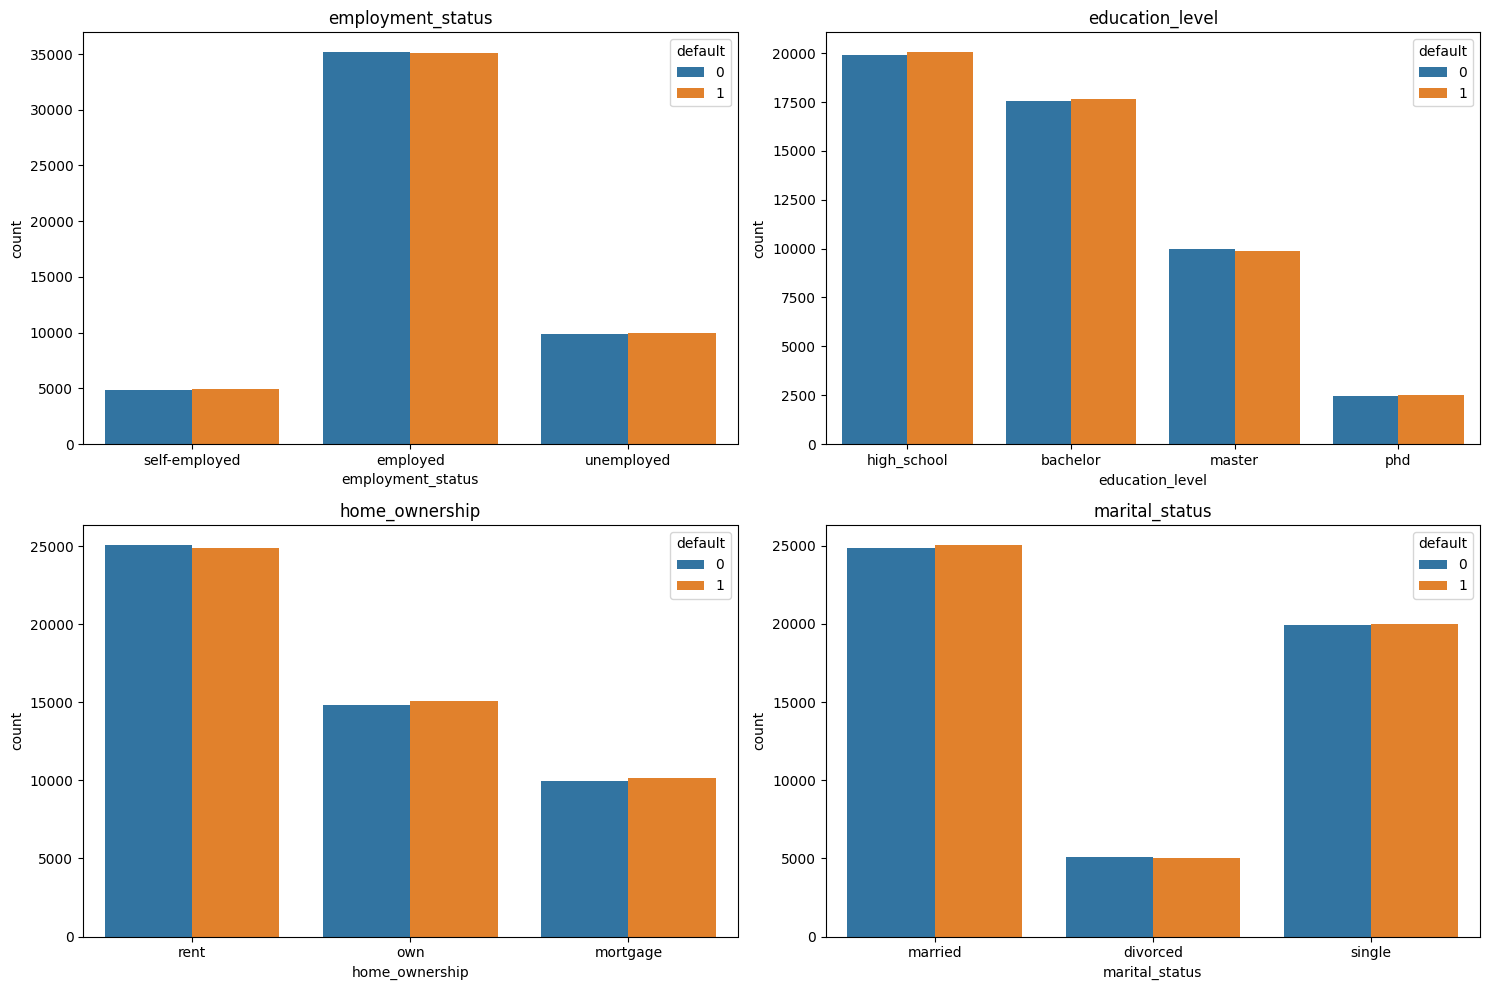

In [10]:
fig,axes = plt.subplots(2,2,figsize=(15,10))
axes = axes.flatten()
for column, ax in zip(categorical_column, axes):
    sns.countplot(x = df[column],ax = ax,hue=df['default'])
    ax.set_title(f"{column}")
plt.tight_layout()  
plt.show()

default
0    35186
1    35124
Name: default, dtype: int64


<Axes: xlabel='default', ylabel='count'>

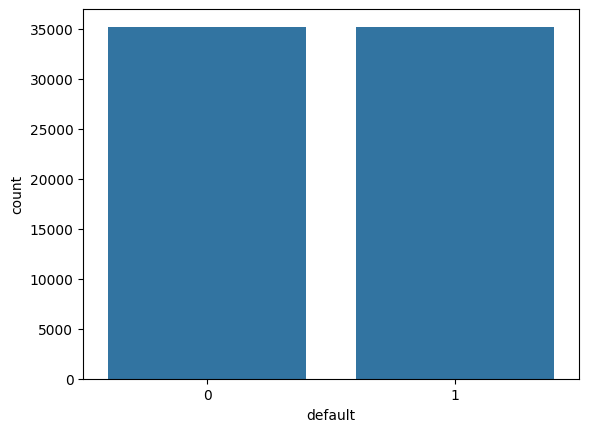

In [11]:
# Confirm uniformity of defaults in one column
tempdf=df[df['employment_status']=='employed']
tempdf
print(tempdf.groupby(tempdf['default'])['default'].count())
sns.countplot(x = tempdf['default'])

- Above plots shows that default of all the categories are approx same as num of non default for all categories.
    1. Employed people are taking loans in large numbers
    2. People with heighest egucation level of High school are high in number in taking loans
    3. Rented people tends to taked more loans
    4. Married people may take high loans because of dependencies

- In a nutshell, Married employees with qualification of high school, who are renting a home, tends to avail loans frequently

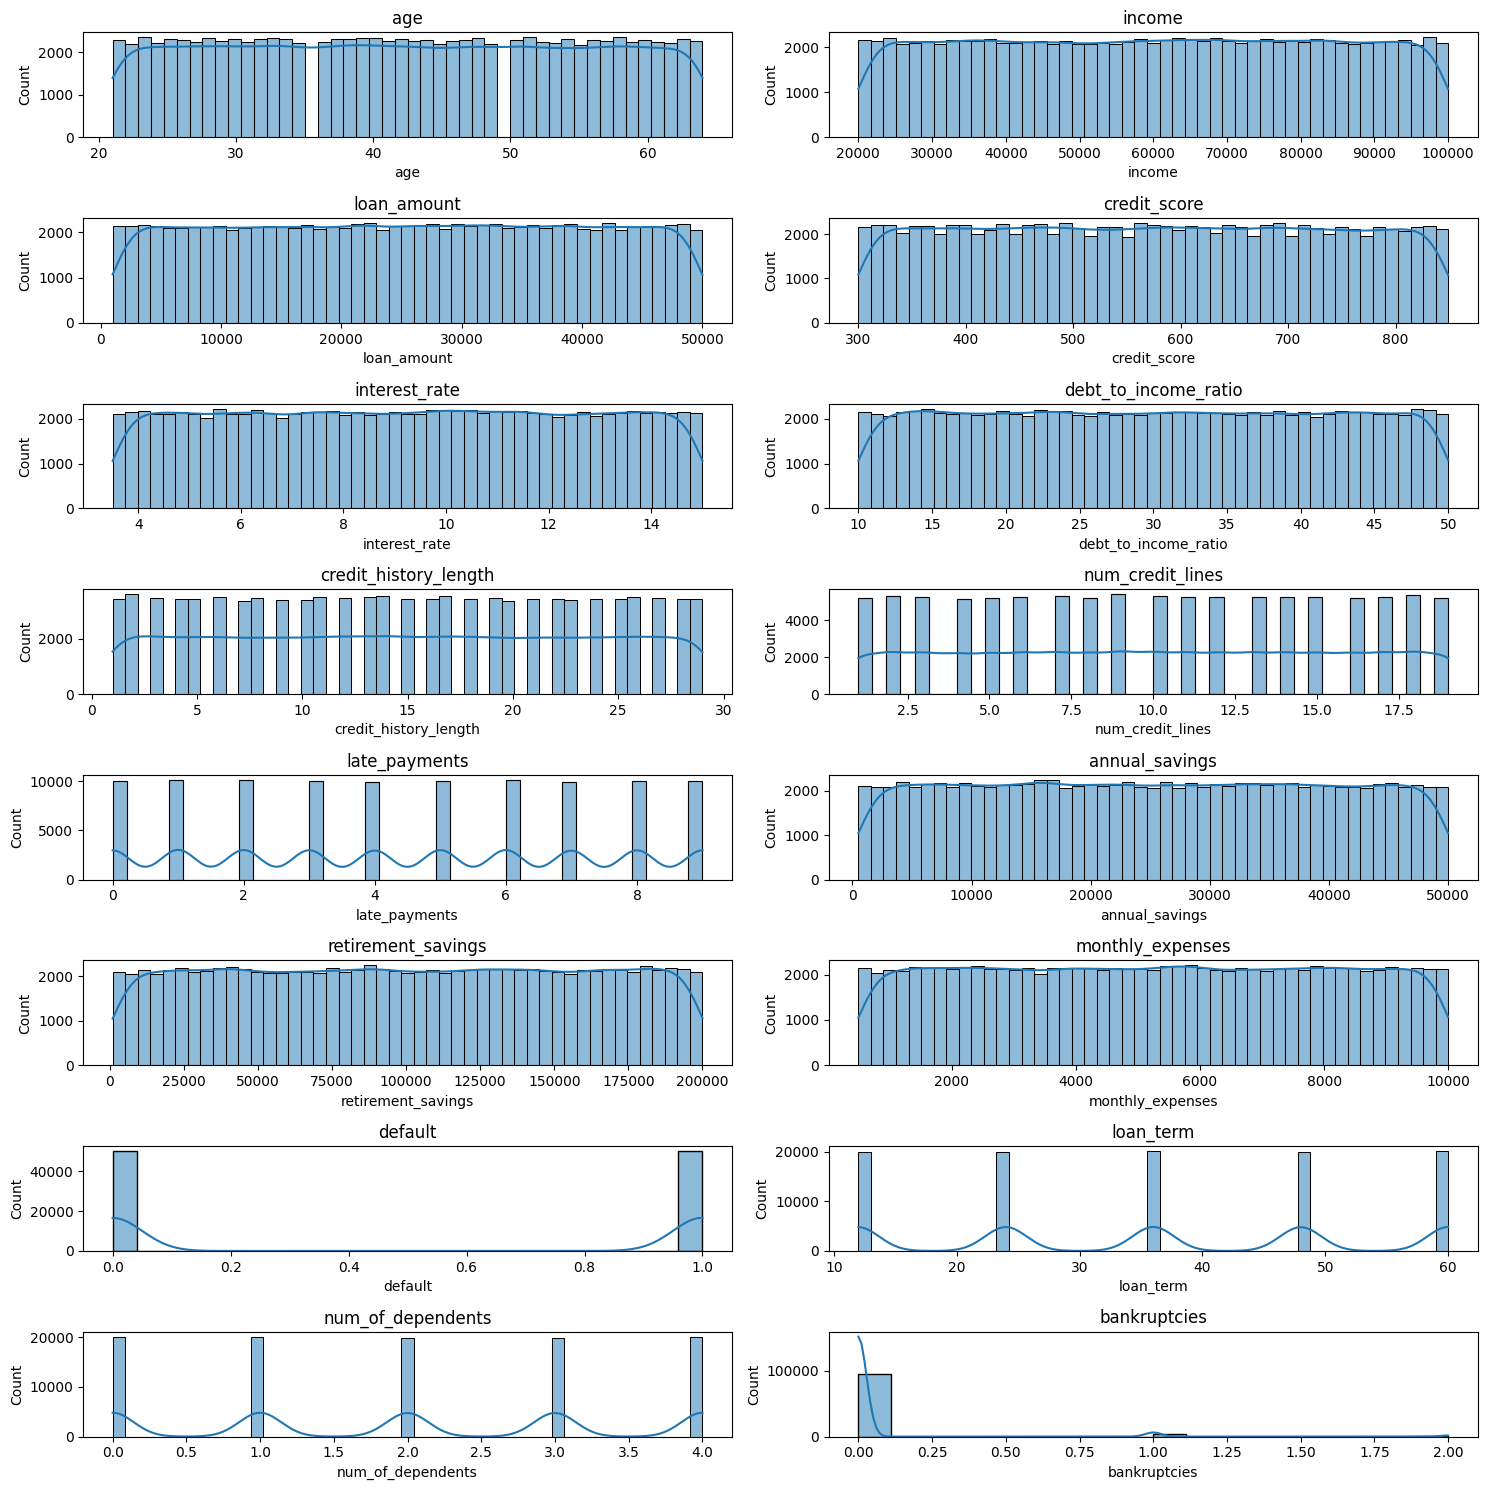

In [12]:
# Distibution of data
fig,axes = plt.subplots(8,2,figsize=(15,15))
axes = axes.flatten()
for column, ax in zip(contineous_column+discrete_column, axes):
    sns.histplot(x = df[column],ax = ax, kde=True)
    ax.set_title(f"{column}")
plt.tight_layout()  
plt.show()

In [13]:
df.groupby(df['default'],).mean(numeric_only=True)

,age,income,loan_amount,credit_score,loan_term,interest_rate,debt_to_income_ratio,num_of_dependents,credit_history_length,num_credit_lines,late_payments,bankruptcies,annual_savings,retirement_savings,monthly_expenses
default,,,,,,,,,,,,,,,
0,42.448944,59916.535186,25505.196670,574.010800,36.169759,9.241521,30.003258,2.003306,14.957500,10.018675,4.493949,0.059031,25284.514147,100629.219974,5253.509418
1,42.476444,60107.555615,25533.873318,573.603485,35.881902,9.268420,29.988519,1.991416,14.994271,10.006667,4.490737,0.060406,25159.594662,100857.638639,5253.180181


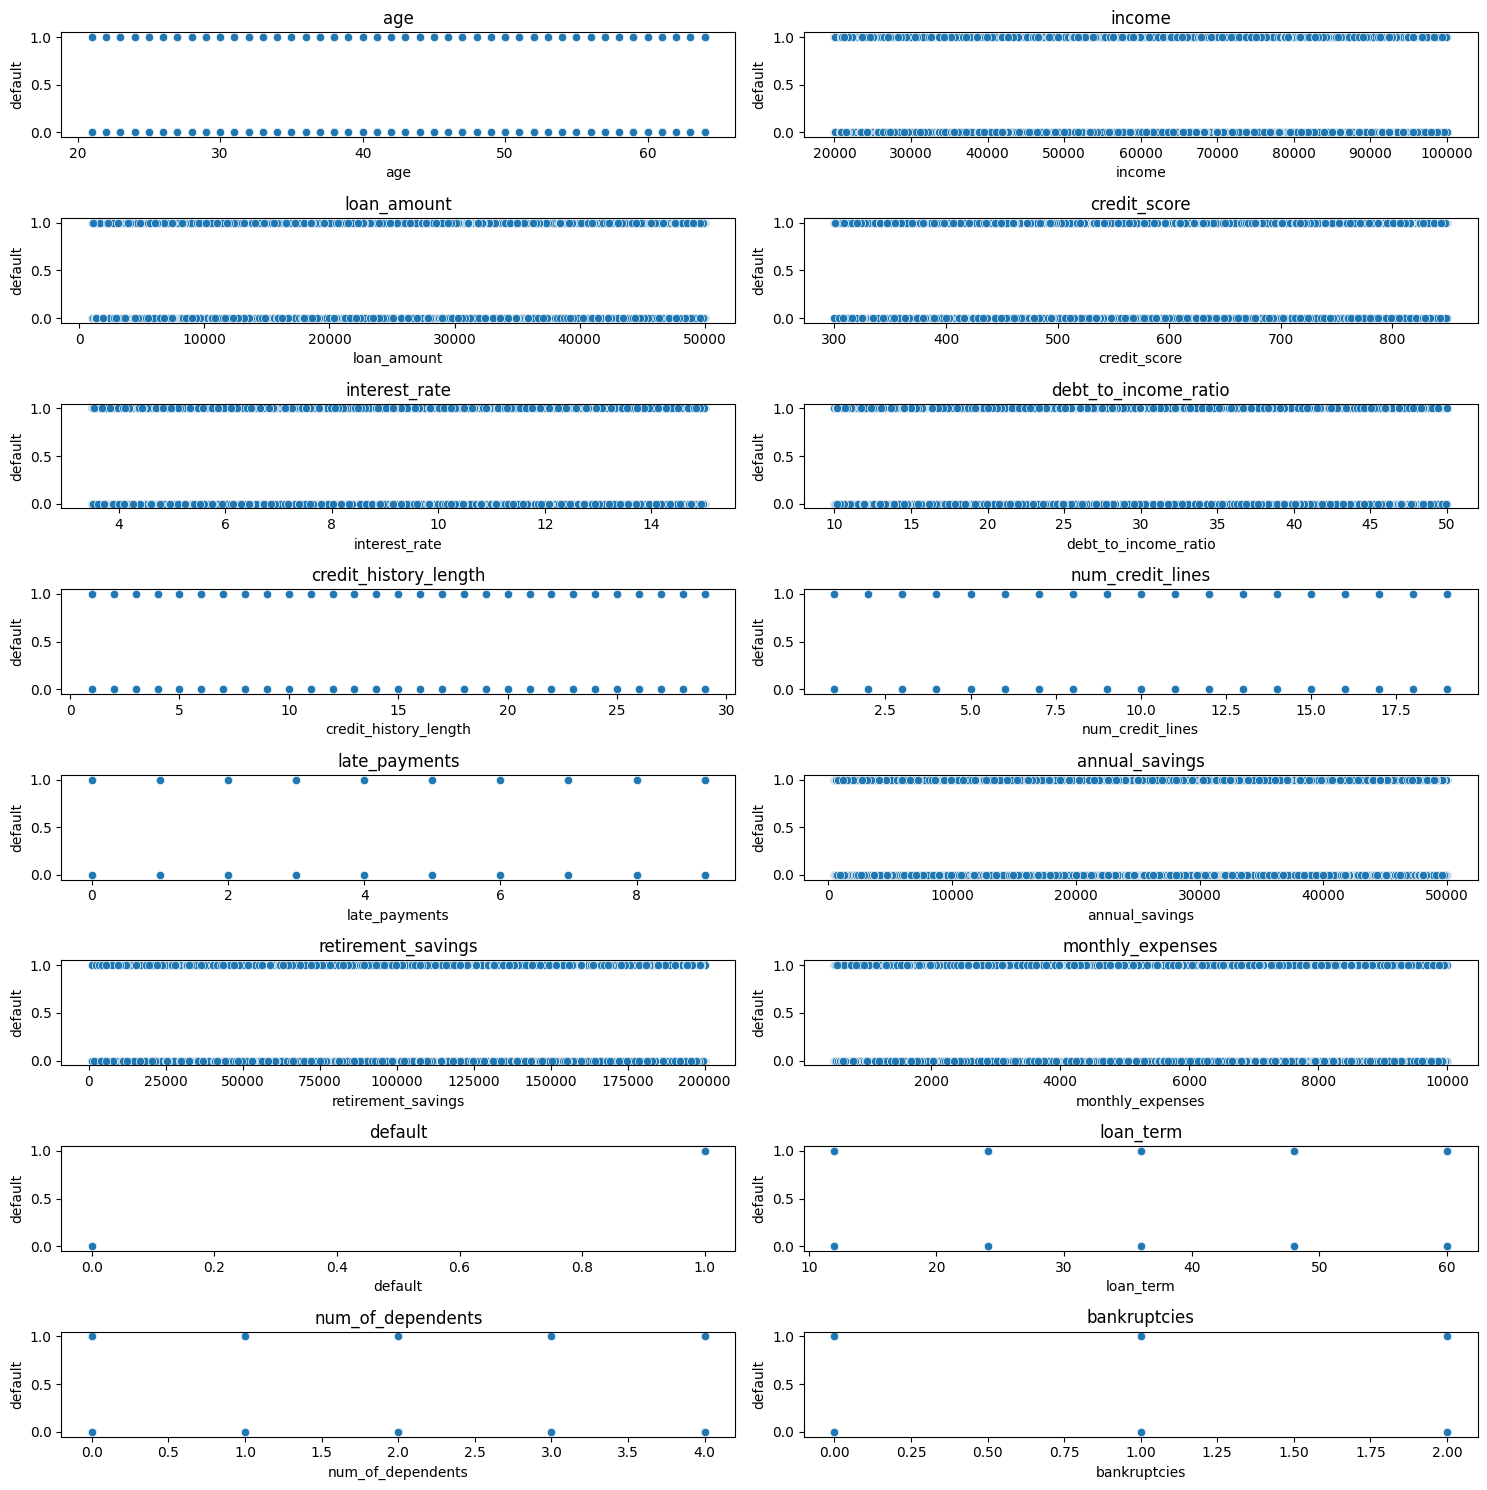

In [14]:
fig,axes = plt.subplots(8,2,figsize=(15,15))
axes = axes.flatten()
for column, ax in zip(contineous_column+discrete_column, axes):
    sns.scatterplot(x = df[column], y=df['default'],ax = ax)
    ax.set_title(f"{column}")
plt.tight_layout()  
plt.show()

- Distribution of all columns looks uniform
- No significant difference in average values of other features WRT default
- As the data is distributed approximately uniformly for both categories of defaul 0 and 1, It is difficult to conclude which feature affects most

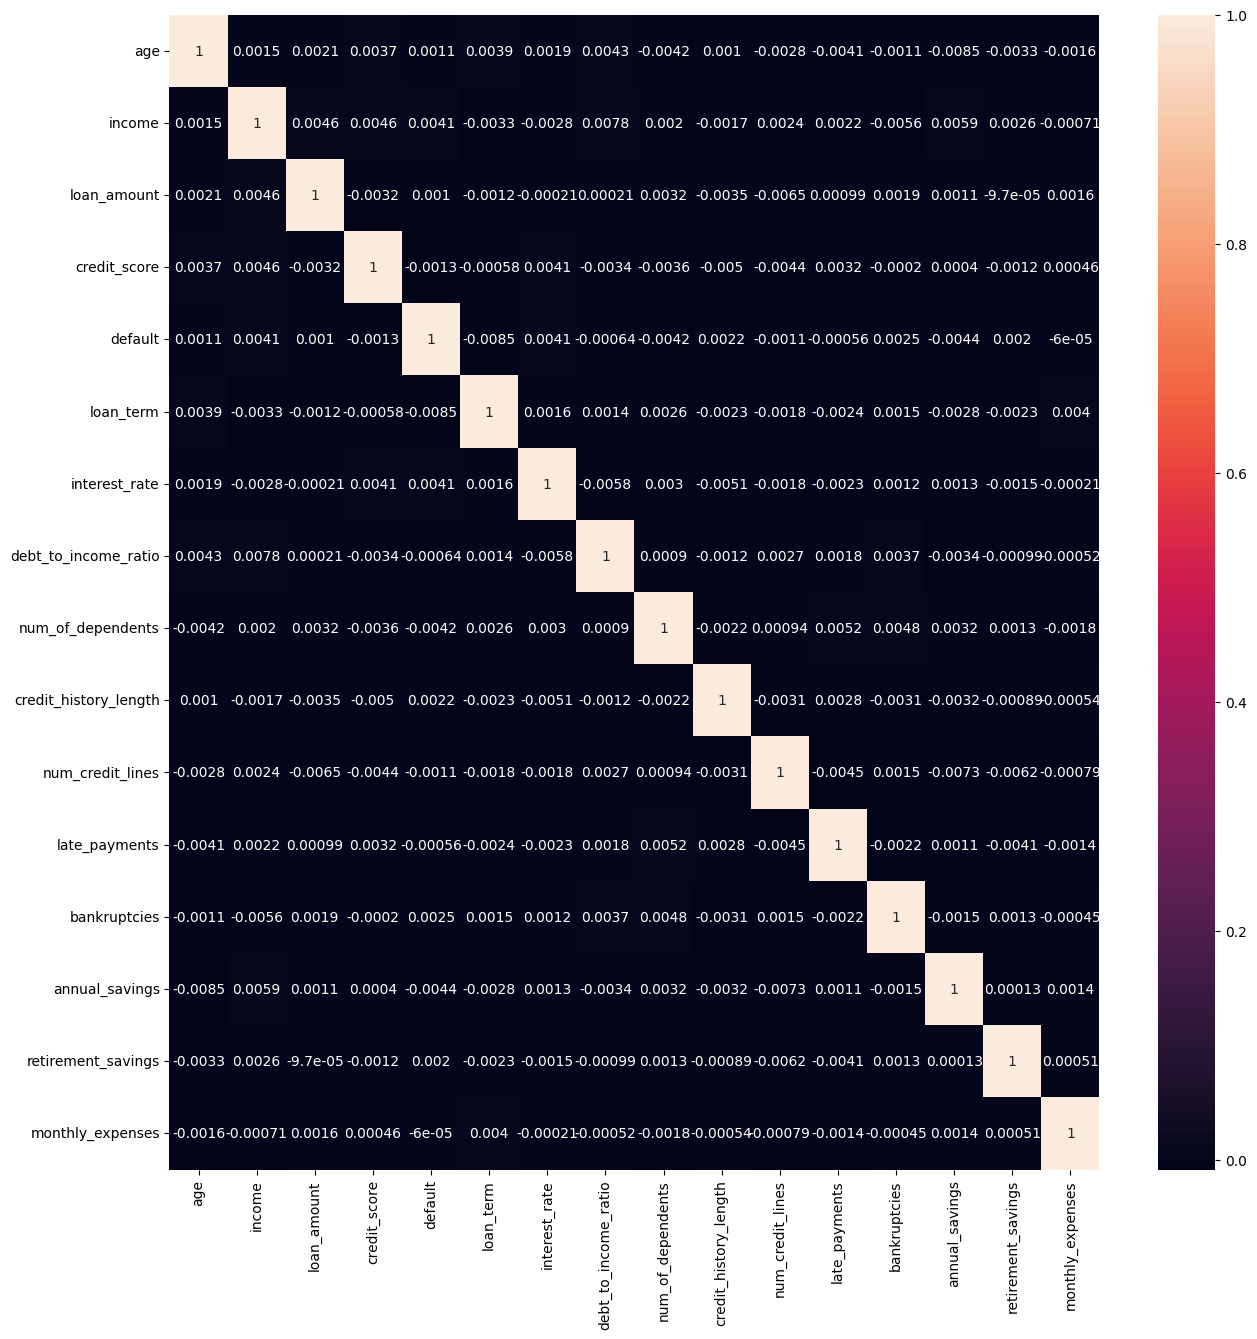

In [15]:
# Correlation check
plt.figure(figsize=(15,15))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True)
plt.show()

- No correlation observed wrt default column

### Outlier treatment

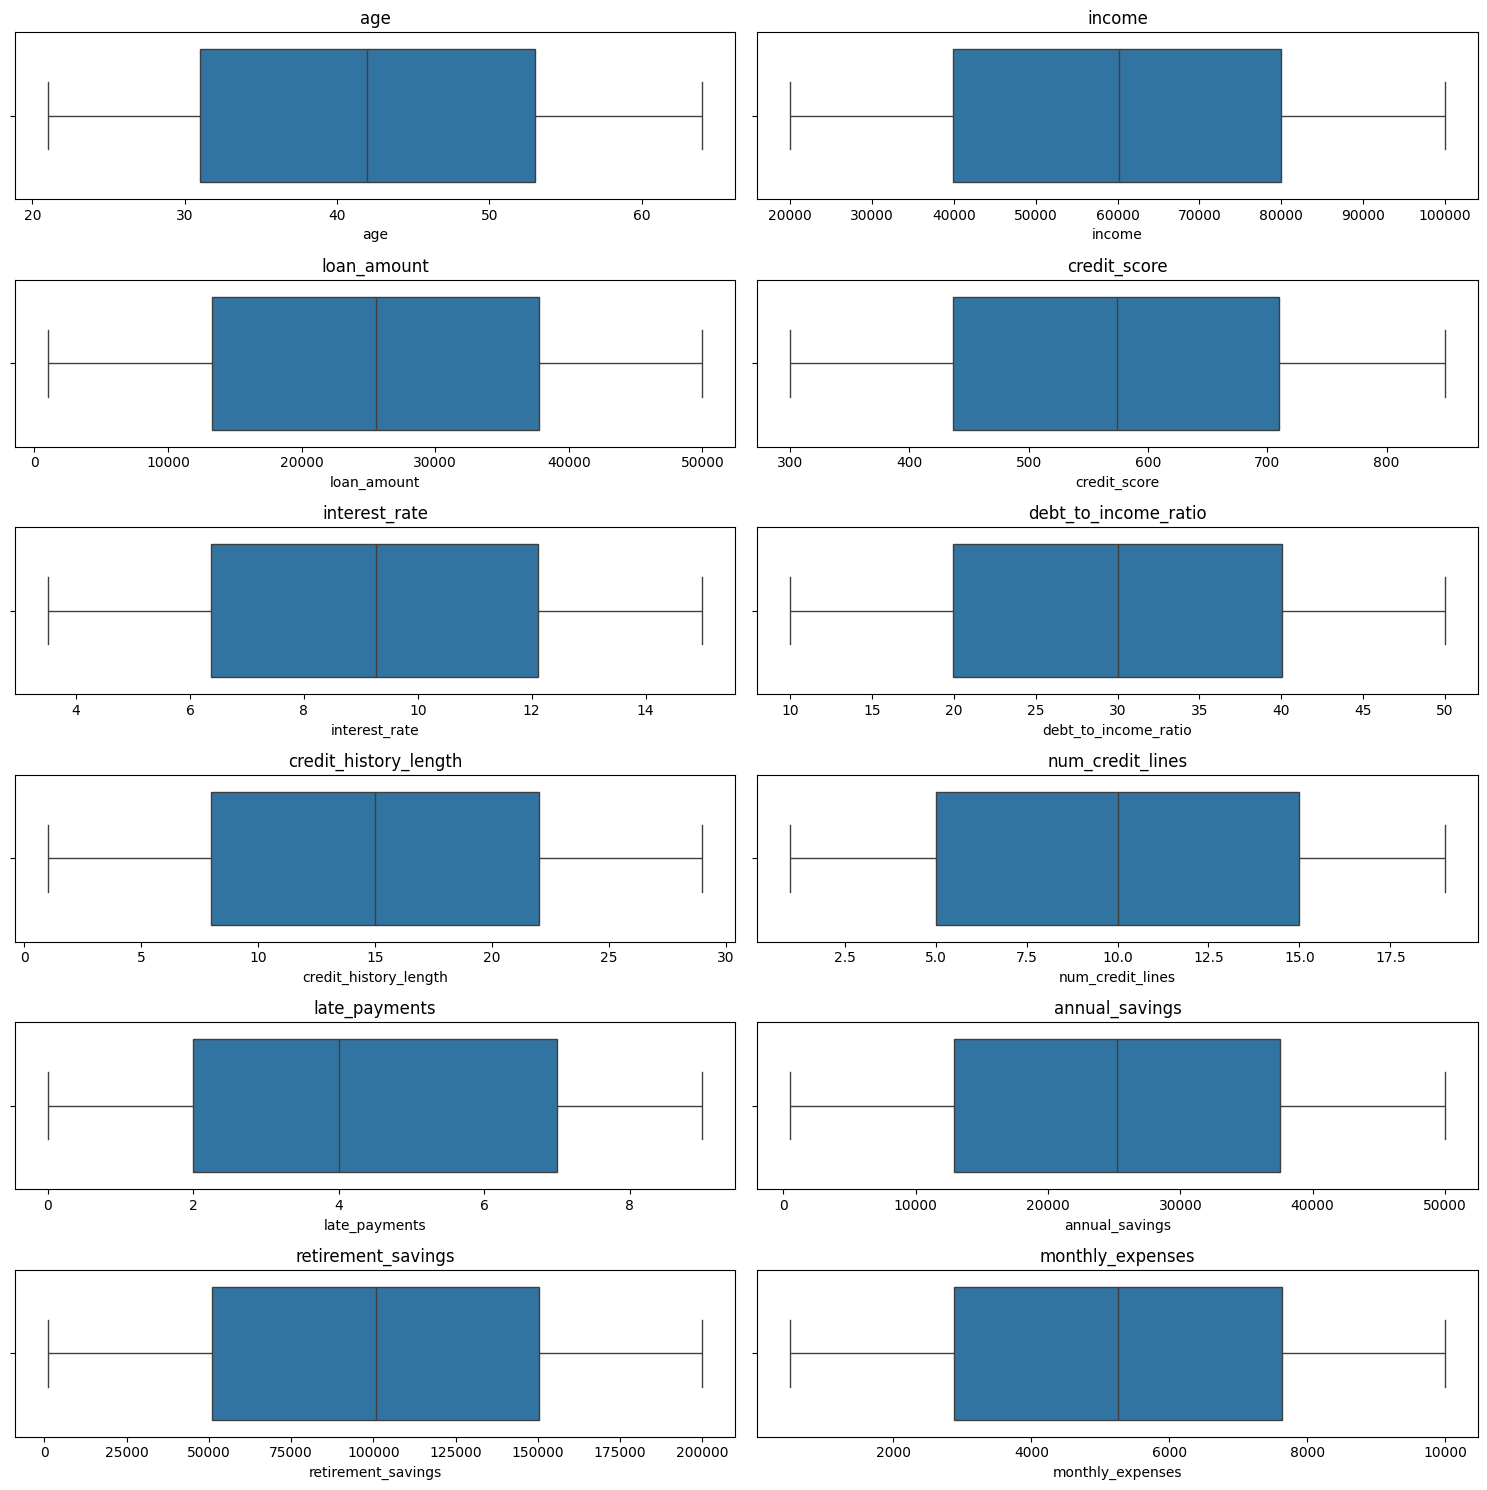

In [16]:
fig,axes = plt.subplots(6,2,figsize=(15,15))
axes = axes.flatten()
for column, ax in zip(contineous_column, axes):
    sns.boxplot(df, x=df[column], ax=ax)
    ax.set_title(f"{column}")
plt.tight_layout()  
plt.show()

- No outlier observed

### Data encoding

In [17]:
for column in categorical_column:
    print(df[column].value_counts(), end='\n\n')
    print(df[column].unique())
    print('-'*50)

employment_status
employed         70310
unemployed       19844
self-employed     9846
Name: count, dtype: int64

['self-employed' 'employed' 'unemployed']
--------------------------------------------------
education_level
high_school    39963
bachelor       35206
master         19857
phd             4974
Name: count, dtype: int64

['high_school' 'bachelor' 'master' 'phd']
--------------------------------------------------
home_ownership
rent        49973
own         29898
mortgage    20129
Name: count, dtype: int64

['rent' 'own' 'mortgage']
--------------------------------------------------
marital_status
married     49954
single      39926
divorced    10120
Name: count, dtype: int64

['married' 'divorced' 'single']
--------------------------------------------------


In [18]:
X=df.drop(['default'], axis=1)
y=df['default']

In [19]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=32)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80000, 19), (20000, 19), (80000,), (20000,))

In [20]:
labeled_features=['employment_status','home_ownership','marital_status']
ordinal_features=['education_level']
education_levels = [['high_school', 'bachelor', 'master', 'phd']]

- Since education levels are ordinal, ordinal encoding is performed
-  Other three categorical columns should be label encoder. But for pipeline, ordinal encoding is performed

In [21]:
preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal', OrdinalEncoder(categories=education_levels), ordinal_features),
        ('label', OrdinalEncoder(), labeled_features)  # Using OrdinalEncoder instead of LabelEncoder for pipeline
    ],
    remainder='passthrough'  # Keeps numerical features unchanged
)

In [22]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinal',
                                 OrdinalEncoder(categories=[['high_school',
                                                             'bachelor',
                                                             'master',
                                                             'phd']]),
                                 ['education_level']),
                                ('label', OrdinalEncoder(),
                                 ['employment_status', 'home_ownership',
                                  'marital_status'])])

In [32]:
preprocessor.fit(X_train)

e:\Development\LearnBay\Git\loan-default-predictor\ldvenv\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinal',
                                 OrdinalEncoder(categories=[['high_school',
                                                             'bachelor',
                                                             'master',
                                                             'phd']]),
                                 ['education_level']),
                                ('label', OrdinalEncoder(),
                                 ['employment_status', 'home_ownership',
                                  'marital_status'])])

In [45]:
std_scalar=StandardScaler()
X_train_scaled=std_scalar.fit_transform(preprocessor.transform(X_train))
X_test_scaled=std_scalar.transform(preprocessor.transform(X_test))

### Logistic regression

In [47]:
logistic_classifier=LogisticRegression()
logistic_classifier.fit(X_train_scaled, y_train)
y_pred = logistic_classifier.predict(X_test_scaled)

In [48]:
accuracy_score(y_test, y_pred)

0.49975

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.41      0.45     10041
           1       0.50      0.59      0.54      9959

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



In [57]:
confusion_matrix(y_test, y_pred)

array([[4131, 5910],
       [4095, 5864]])

In [56]:
logistic_classifier.predict_proba(X_train_scaled)[:6]

array([[0.51270649, 0.48729351],
       [0.49033708, 0.50966292],
       [0.49284776, 0.50715224],
       [0.49467488, 0.50532512],
       [0.49510372, 0.50489628],
       [0.49258684, 0.50741316]])

According to the distribution of given data wrt default values 0 and 1, It is observed that the data is diversified equally for both 0 and 1 values of default. This makes model difficult to find patterns as the dividing line falls in between. 

In [ ]:
# Create models list to perform model building
models_list={'random_forest_classifier':RandomForestClassifier(n_estimators=100, random_state=32),
             'xg_boost_classifier':XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
             'decision_tree_classifier':DecisionTreeClassifier(),
             'gradient_boosting_classifier':GradientBoostingClassifier()
             }

In [ ]:
# Fit and Evaluate models to find best model
def evaluate_models(X_train, y_train,X_test,y_test,models,param):
    try:
        report = {}

        for i in range(len(list(models))):
            model = list(models.values())[i]
            # para=param[list(models.keys())[i]]

            # gs = GridSearchCV(model,para,cv=3)
            # gs.fit(X_train,y_train)

            model.set_params(**gs.best_params_)
            model.fit(X_train,y_train)

            y_train_pred = model.predict(X_train)

            y_test_pred = model.predict(X_test)

            # train_model_score = accuracy_score(y_train, y_train_pred)

            test_model_score = accuracy_score(y_test, y_test_pred)

            report[list(models.keys())[i]] = test_model_score

        return report

    except Exception as e:
        raise


In [ ]:
# Parameters to perform hyper parameters tuning
# Not using as its taking computationally heavy in local system
param_grid = {
    'random_forest_classifier': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    },

    'xg_boost_classifier': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 6, 10],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0]
    },

    'decision_tree_classifier': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },

    'gradient_boosting_classifier': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.6, 0.8, 1.0]
    }
}
# Include params if required. Not including params as data is balanced and could not find patterns even with params
models_report=evaluate_models(X_train_scaled, y_train,X_test_scaled,y_test,models_list,dict())
models_report

{'random_forest_classifier': 0.49455,
 'xg_boost_classifier': 0.4933,
 'decision_tree_classifier': 0.4939,
 'gradient_boosting_classifier': 0.4993}

In [ ]:
# Params for grid search only for XG boost algo
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 6, 10],
    'classifier__subsample': [0.6, 0.8, 1.0],
    'classifier__colsample_bytree': [0.6, 0.8, 1.0]
}
# Prediction pipeline with preprocessor, scaling and xg classifier
pred_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('feature_scaling', StandardScaler()),
                                     ('classifier', XGBClassifier(random_state=42))])

In [67]:
pred_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal',
                                                  OrdinalEncoder(categories=[['high_school',
                                                                              'bachelor',
                                                                              'master',
                                                                              'phd']]),
                                                  ['education_level']),
                                                 ('label', OrdinalEncoder(),
                                                  ['employment_status',
                                                   'home_ownership',
                                                   'marital_status'])])),
                ('feature_scaling', StandardScaler()),
                ('classifier',
                 XGBClassifier(base_sco...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [ ]:
# Hyper param tuning for XG boost
grid_search = GridSearchCV(
    pred_pipeline, 
    param_grid, 
    scoring='accuracy', 
    cv=5, 
    n_jobs=-1, 
    verbose=2
)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


e:\Development\LearnBay\Git\loan-default-predictor\ldvenv\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinal',
                                                                         OrdinalEncoder(categories=[['high_school',
                                                                                                     'bachelor',
                                                                                                     'master',
                                                                                                     'phd']]),
                                                                         ['education_level']),
                                                                        ('label',
                                                                         OrdinalEncoder(),
                                                                         ['employment_status',
                                                                          'home_ownership',
                                                                          'marital_status'])])),
                                       ('feature_scaling', StandardScaler()),
                                       ('classi...
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'classifier__colsample_bytree': [0.6, 0.8, 1.0],
                         'classifier__learning_rate': [0.01, 0.1, 0.2],
                         'classifier__max_depth': [3, 6, 10],
                         'classifier__n_estimators': [100, 200, 300],
                         'classifier__subsample': [0.6, 0.8, 1.0]},
             scoring='accuracy', verbose=2)

In [69]:
best_pipeline = grid_search.best_estimator_
best_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal',
                                                  OrdinalEncoder(categories=[['high_school',
                                                                              'bachelor',
                                                                              'master',
                                                                              'phd']]),
                                                  ['education_level']),
                                                 ('label', OrdinalEncoder(),
                                                  ['employment_status',
                                                   'home_ownership',
                                                   'marital_status'])])),
                ('feature_scaling', StandardScaler()),
                ('classifier',
                 XGBClassifier(base_sco...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=10, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [ ]:
# Predict with test data
y_pred = best_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.4972

In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.49      0.50     10041
           1       0.50      0.50      0.50      9959

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



In [72]:
confusion_matrix(y_test, y_pred)

array([[4929, 5112],
       [4944, 5015]])